In [1]:
import itertools as it
import os

os.environ["PRIVBAYES_BIN"] = "./ydnpd/synthesis/privbayes"

import ray
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display, Markdown

import ydnpd

2024-08-13 21:17:12,357	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
/home/ec2-user/YDNPD/clone1/YDNPD/ydnpd/synthesis/core.py:9: UserWarning: SynthCity is not installed. Please install it to use SynthCity synthesizers.
  warnings.warn(
/home/ec2-user/YDNPD/clone1/YDNPD/ydnpd/synthesis/core.py:17: UserWarning: SDV is not installed. Please install it to use SDV synthesizers.
  warnings.warn("SDV is not installed. Please install it to use SDV synthesizers.")
/opt/conda/envs/ydnpd/lib/python3.10/site-packages/mbi/__init__.py:17: UserWarning: MixtureInference disabled, please install jax and jaxlib
  warnings.warn("MixtureInference disabled, please install jax and jaxlib")


## Tasks

In [2]:
total_task_size = 0
for idx, task in enumerate(ydnpd.span_utility_tasks(), start=1):
    print(f"{idx:2} {task}")
    total_task_size += task.size()
print(f"\nTotal task size: {total_task_size}")

 1 <UtilityTask (#configs=144): privbayes & acs/massachusetts>
 2 <UtilityTask (#configs=144): privbayes & acs/national>

Total task size: 288


## Execute Tasks

In [3]:
ray.init(num_cpus=7)

2024-08-13 21:17:18,350	INFO worker.py:1781 -- Started a local Ray instance.


Python version:,3.10.14
Ray version:,2.34.0


In [4]:
utility_tasks = ydnpd.span_utility_ray_tasks(with_wandb=False)
utility_tasks_results = ray.get(utility_tasks)
utility_tasks_results = list(it.chain(*utility_tasks_results))

(pid=24156) /home/ec2-user/YDNPD/clone1/YDNPD/ydnpd/synthesis/core.py:9: UserWarning: SynthCity is not installed. Please install it to use SynthCity synthesizers.
(pid=24156)   warnings.warn(
(pid=24156) /home/ec2-user/YDNPD/clone1/YDNPD/ydnpd/synthesis/core.py:17: UserWarning: SDV is not installed. Please install it to use SDV synthesizers.
(pid=24156)   warnings.warn("SDV is not installed. Please install it to use SDV synthesizers.")
(pid=24156) /opt/conda/envs/ydnpd/lib/python3.10/site-packages/mbi/__init__.py:17: UserWarning: MixtureInference disabled, please install jax and jaxlib
(pid=24156)   warnings.warn("MixtureInference disabled, please install jax and jaxlib")


(function pid=24161) UtilityTask: dataset = acs/massachusetts synth_name=privbayes, epsilon=1, hparams={'theta': 2, 'epsilon_split': 0.1} run=1/4
(function pid=24156) UtilityTask: dataset = acs/national synth_name=privbayes, epsilon=1, hparams={'theta': 2, 'epsilon_split': 0.1} run=1/4
(function pid=24161) real
(function pid=24161) 2	
(function pid=24156) 2	
(function pid=24161) UtilityTask: dataset = acs/massachusetts synth_name=privbayes, epsilon=1, hparams={'theta': 2, 'epsilon_split': 0.1} run=2/4
(function pid=24161) 2	
(function pid=24161) UtilityTask: dataset = acs/massachusetts synth_name=privbayes, epsilon=1, hparams={'theta': 2, 'epsilon_split': 0.1} run=3/4
(function pid=24156) UtilityTask: dataset = acs/national synth_name=privbayes, epsilon=1, hparams={'theta': 2, 'epsilon_split': 0.1} run=2/4
(function pid=24161) 2	
(function pid=24156) 2	
(function pid=24161) UtilityTask: dataset = acs/massachusetts synth_name=privbayes, epsilon=1, hparams={'theta': 2, 'epsilon_split': 0

## Utility-Related Tasks

## ACS

### marginals_3_max_abs_diff_error

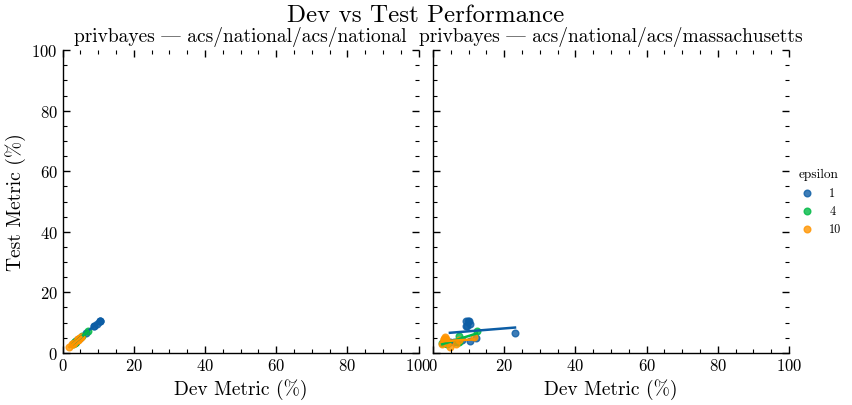

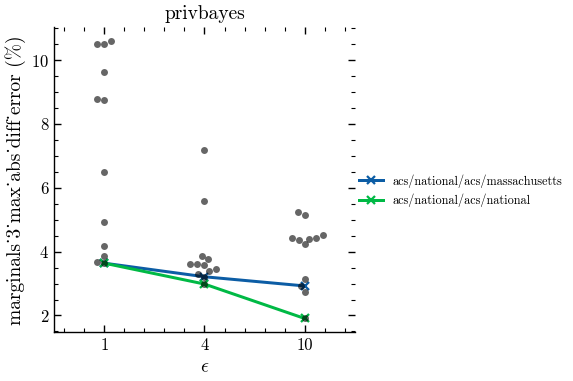

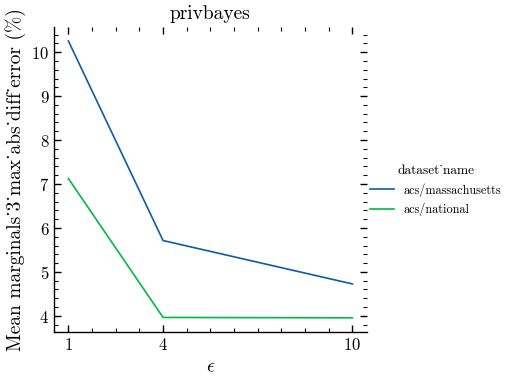

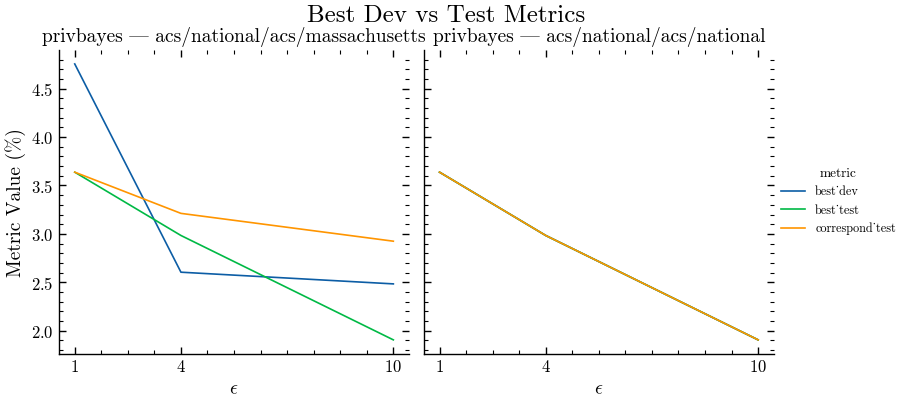

### marginals_3_avg_abs_diff_error

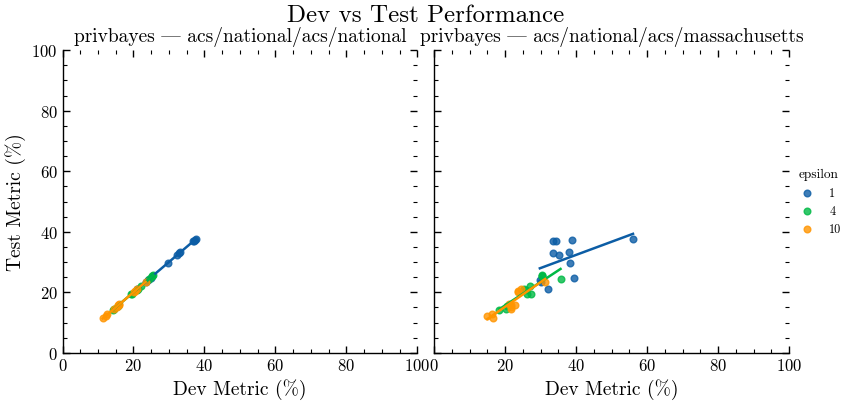

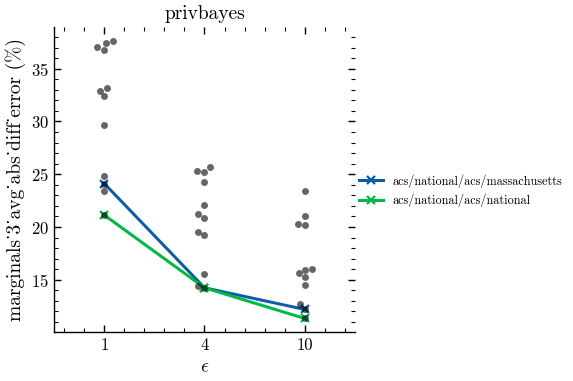

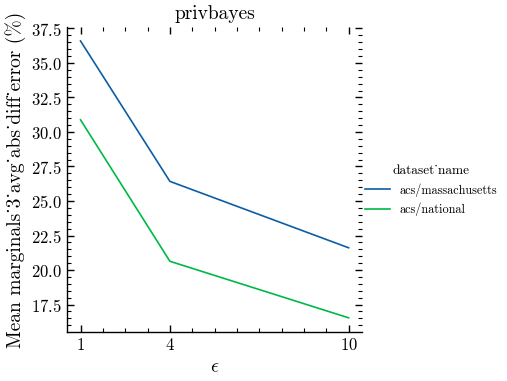

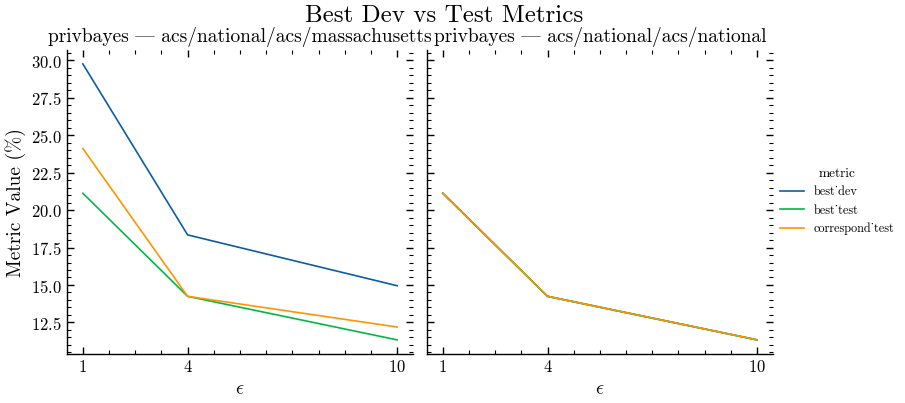

### thresholded_marginals_3_max_abs_diff_error

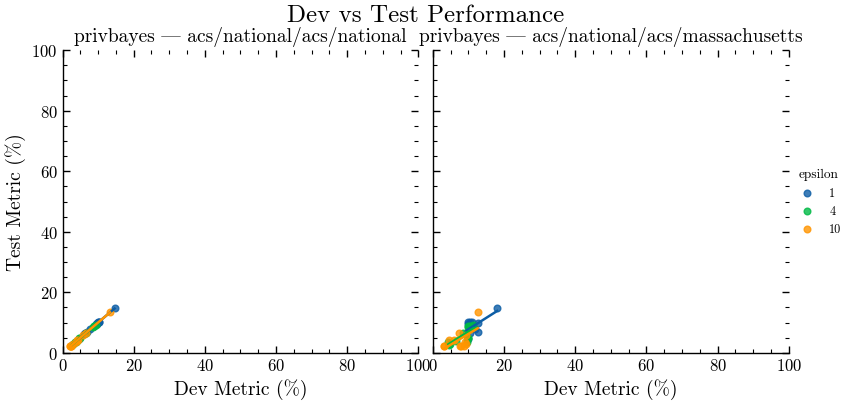

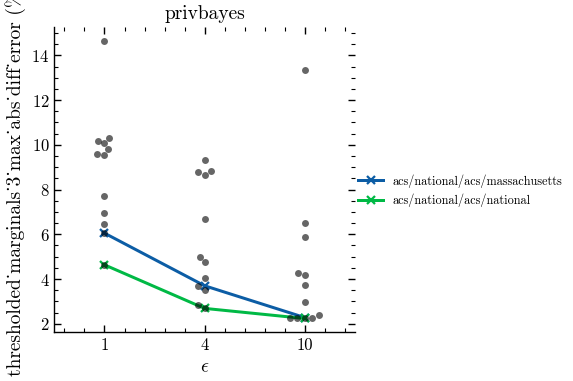

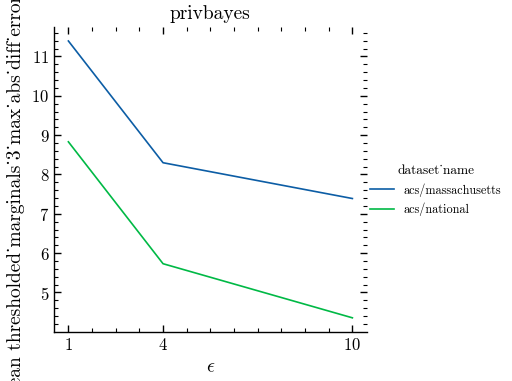

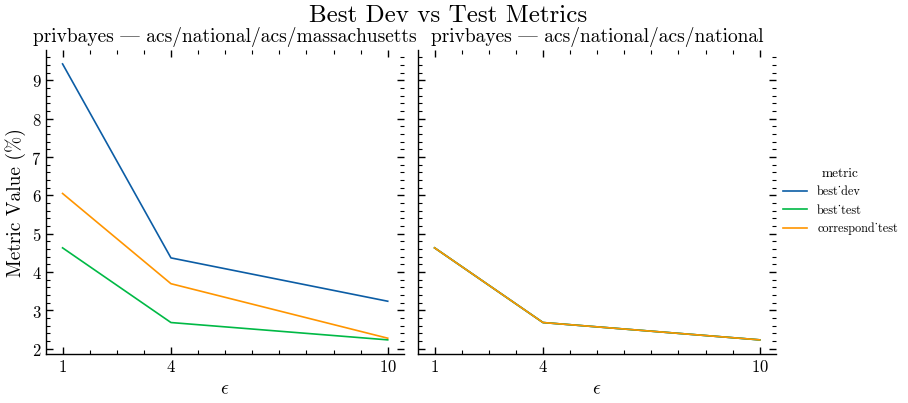

### thresholded_marginals_3_avg_abs_diff_error

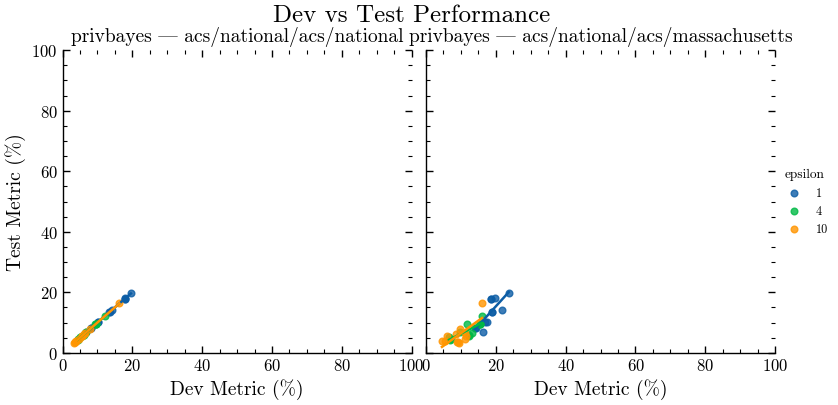

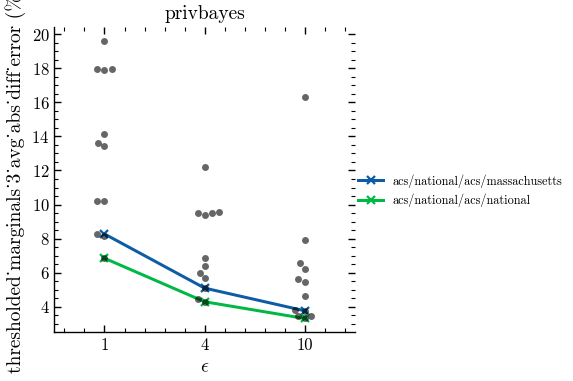

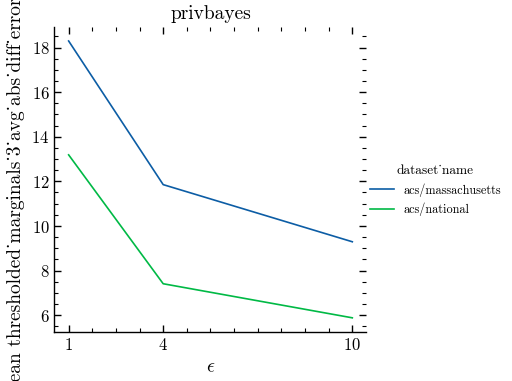

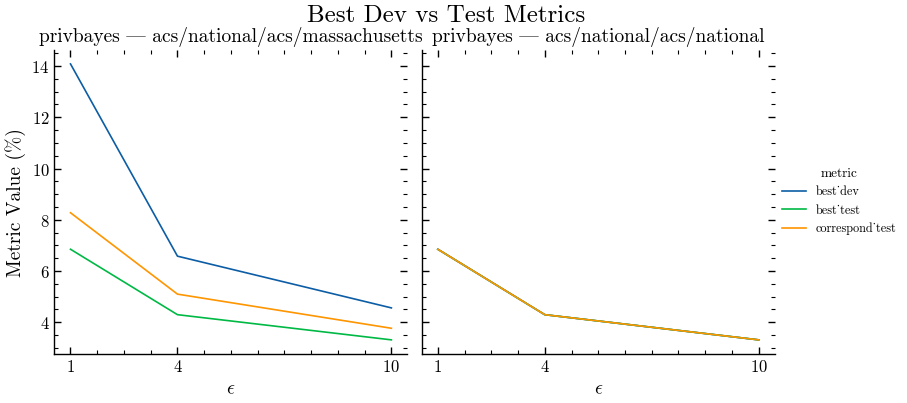

### pearson_corr_max_abs_diff

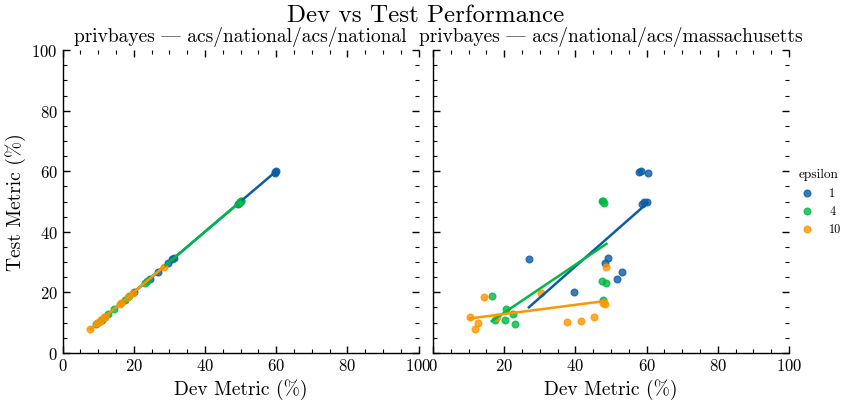

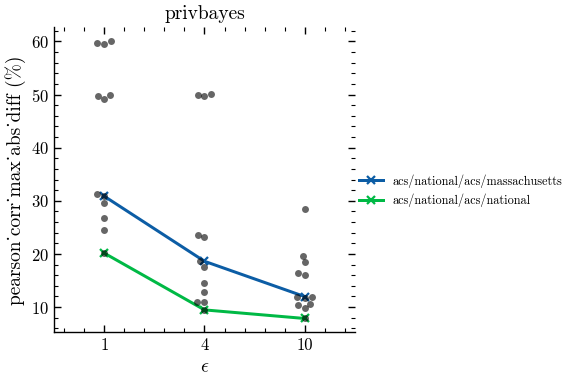

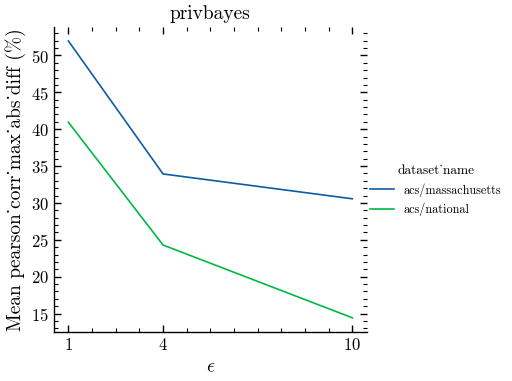

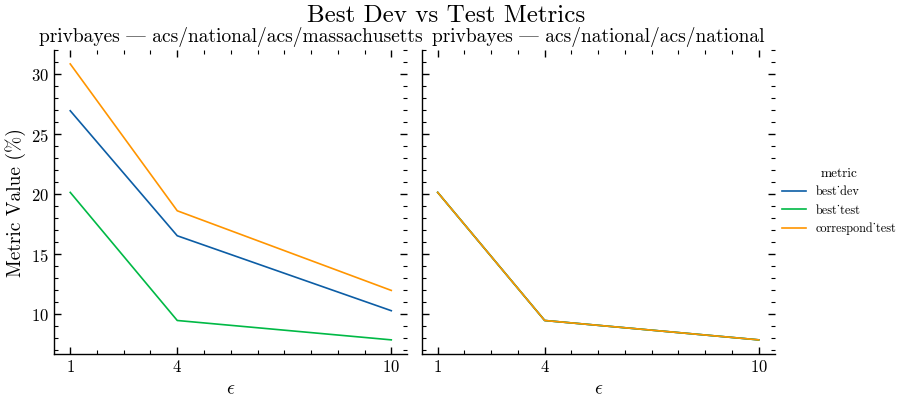

### pearson_corr_avg_abs_diff

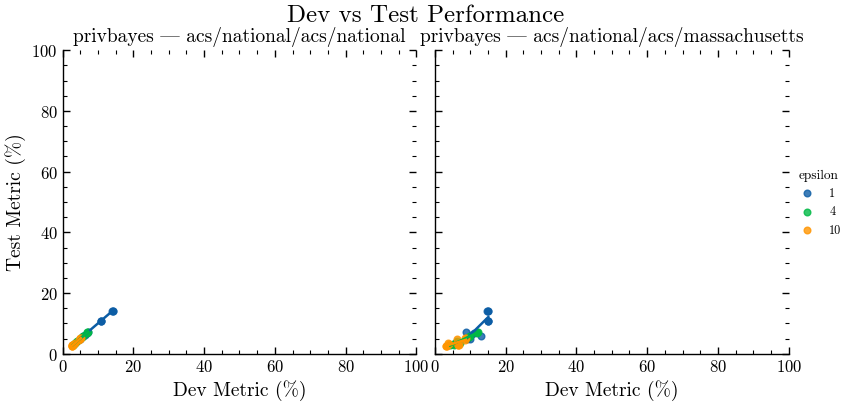

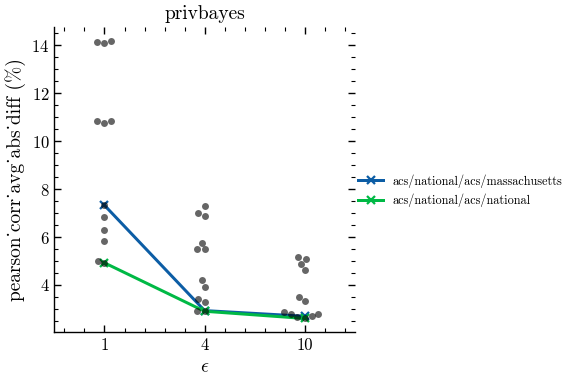

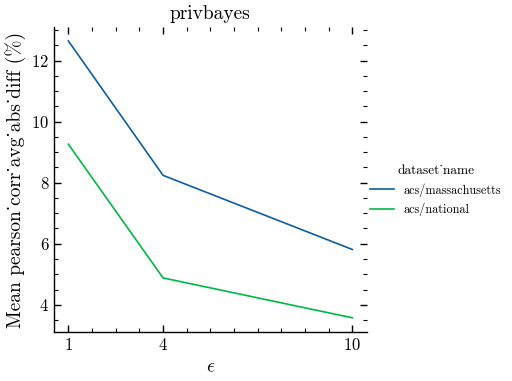

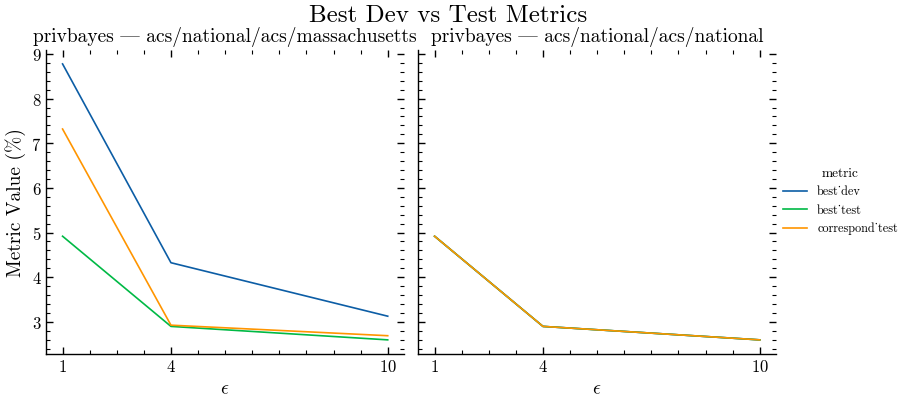

### cramer_v_corr_max_abs_diff

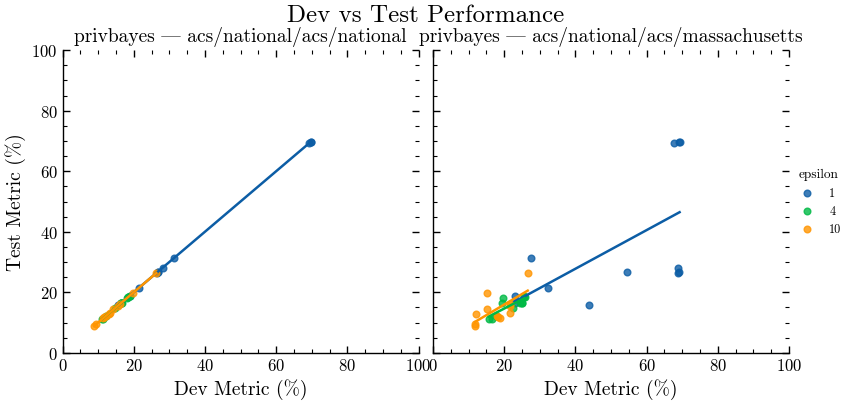

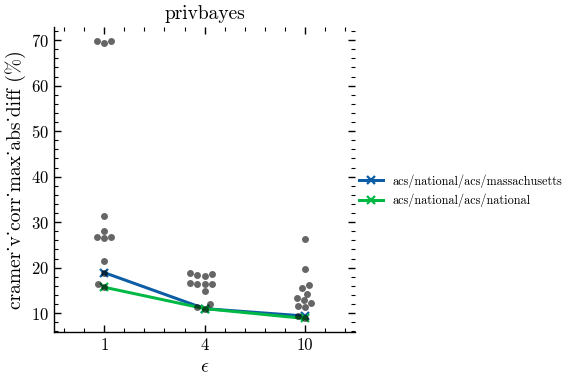

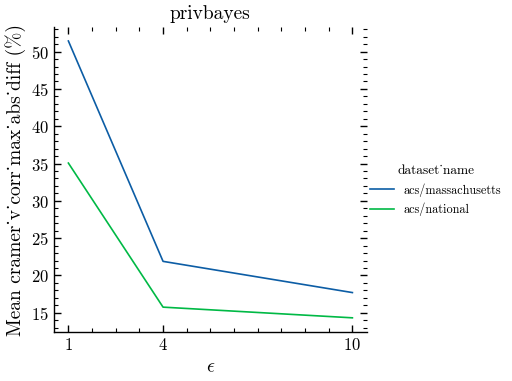

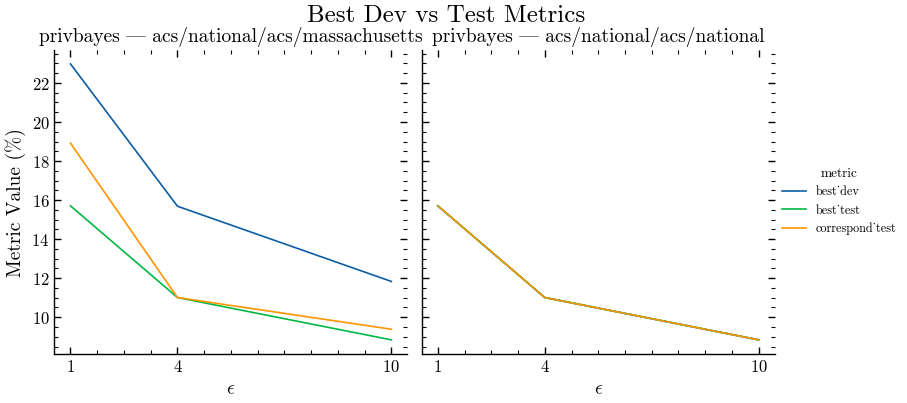

### cramer_v_corr_avg_abs_diff

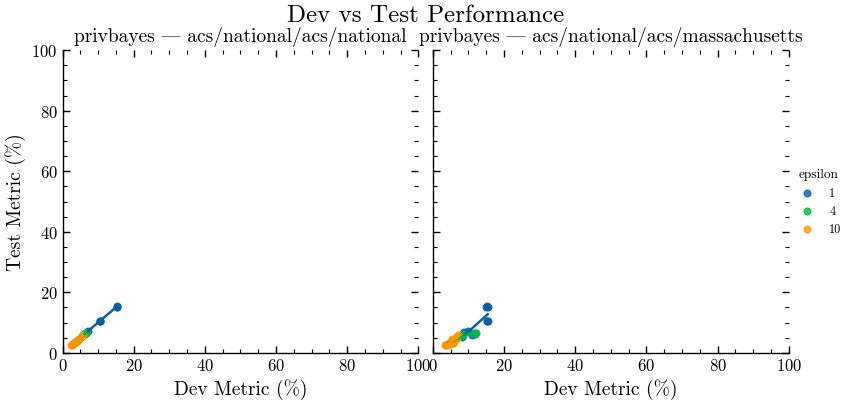

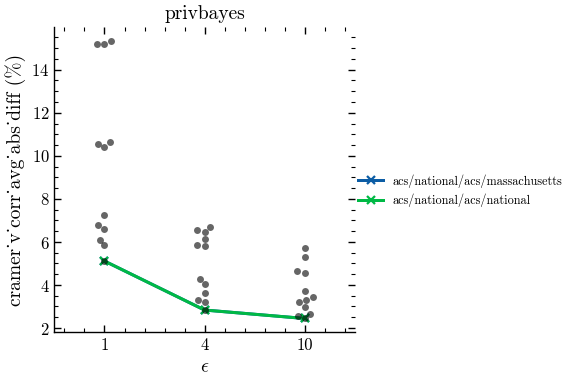

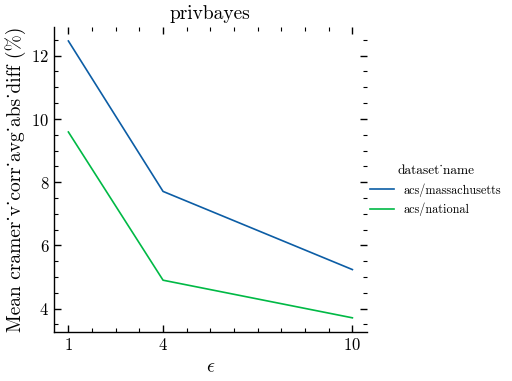

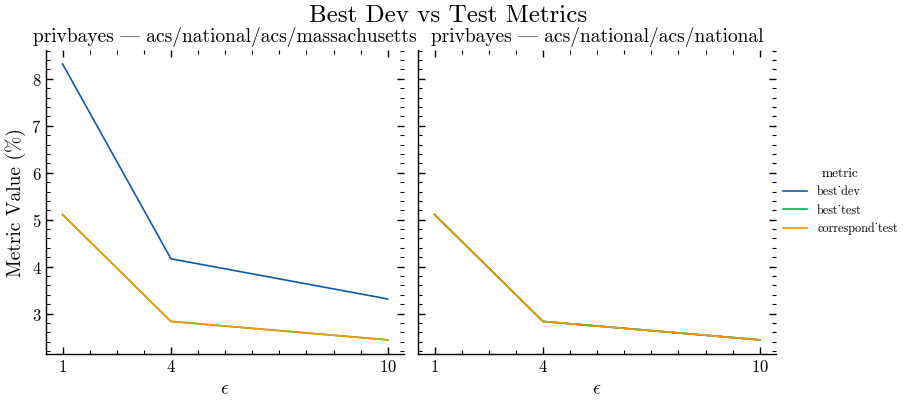

### accuracy_diff

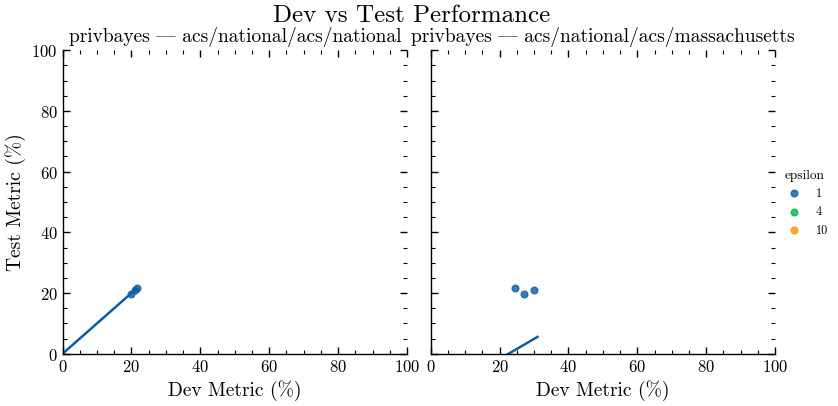

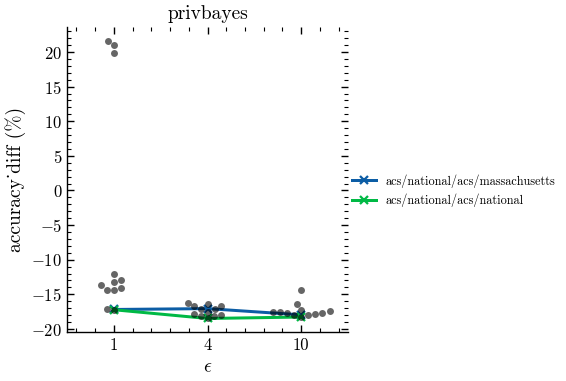

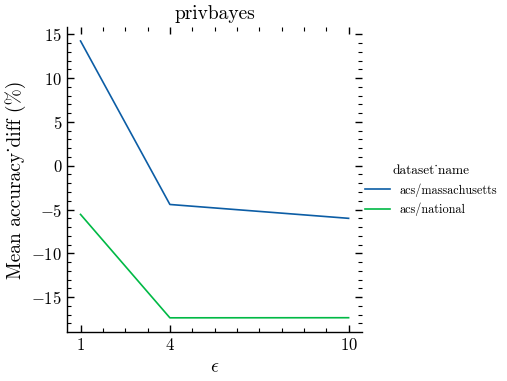

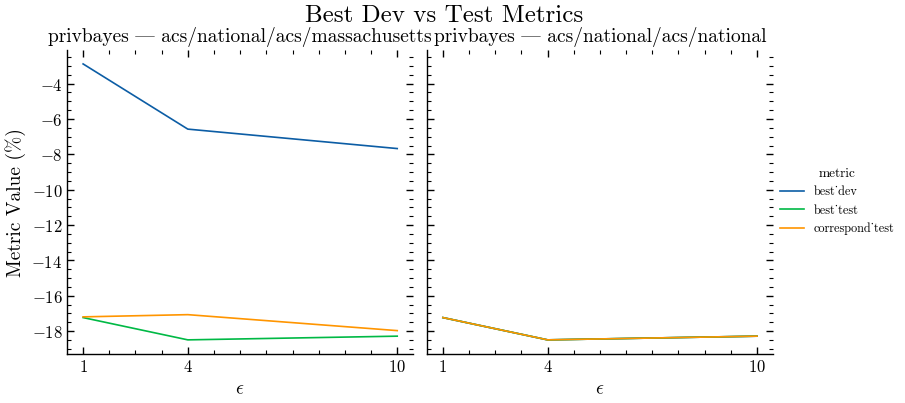

### auc_diff

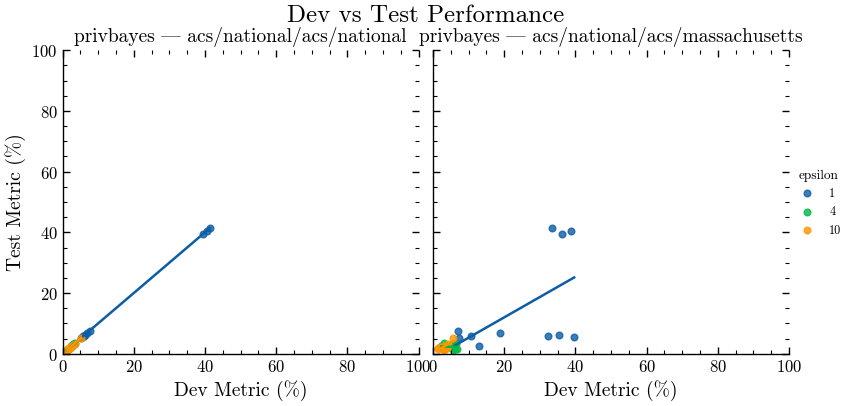

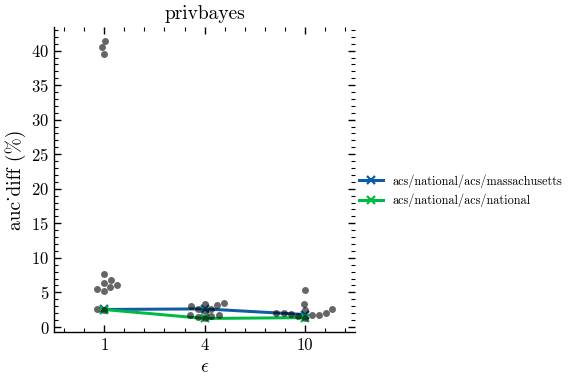

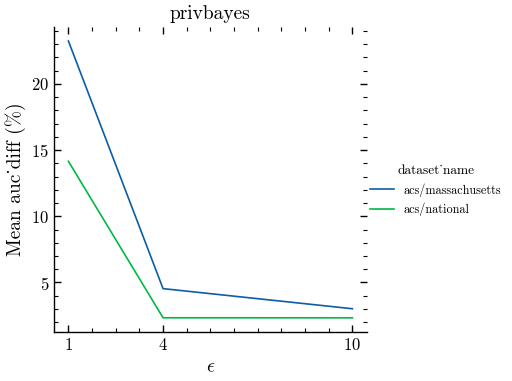

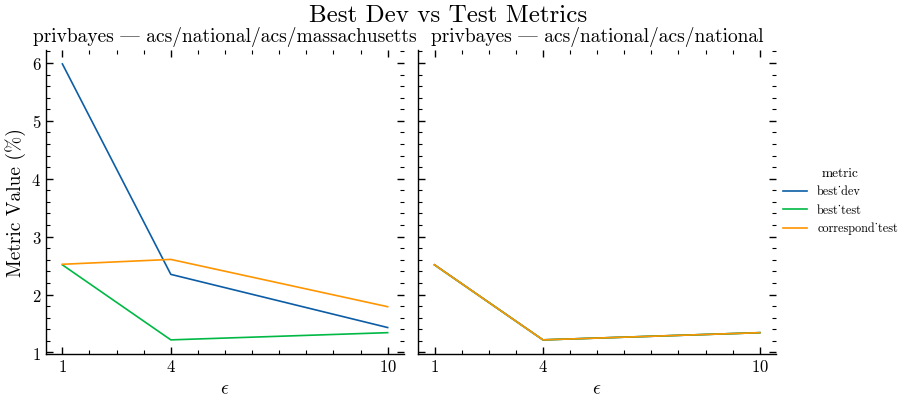

### marginals_3_max_abs_diff_error

quantile  best_dev  \
synth_name experiment                     epsilon                       
privbayes  acs/national/acs/massachusetts 1             0.0       4.8   
                                          4             8.3       2.6   
                                          10           16.7       2.5   
           acs/national/acs/national      1             0.0       3.6   
                                          4             0.0       3.0   
                                          10            0.0       1.9   

                                                   correspond_test  best_test  \
synth_name experiment                     epsilon                               
privbayes  acs/national/acs/massachusetts 1                    3.6        3.6   
                                          4                    3.2        3.0   
                                          10                   2.9        1.9   
           acs/national/acs/national      1                    3.6        3.6   
                                          4                    3.0        3.0   
                                          10                   1.9        1.9   

                                                   median_test  worst_test  
synth_name experiment                     epsilon                           
privbayes  acs/national/acs/massachusetts 1                7.6        10.6  
                                          4                3.6         7.2  
                                          10               4.4         5.2  
           acs/national/acs/national      1                7.6        10.6  
                                          4                3.6         7.2  
                                          10               4.4         5.2

### marginals_3_avg_abs_diff_error

quantile  best_dev  \
synth_name experiment                     epsilon                       
privbayes  acs/national/acs/massachusetts 1            16.7      29.8   
                                          4             0.0      18.3   
                                          10            8.3      14.9   
           acs/national/acs/national      1             0.0      21.1   
                                          4             0.0      14.2   
                                          10            0.0      11.3   

                                                   correspond_test  best_test  \
synth_name experiment                     epsilon                               
privbayes  acs/national/acs/massachusetts 1                   24.1       21.1   
                                          4                   14.2       14.2   
                                          10                  12.2       11.3   
           acs/national/acs/national      1                   21.1       21.1   
                                          4                   14.2       14.2   
                                          10                  11.3       11.3   

                                                   median_test  worst_test  
synth_name experiment                     epsilon                           
privbayes  acs/national/acs/massachusetts 1               32.7        37.6  
                                          4               21.0        25.6  
                                          10              15.8        23.4  
           acs/national/acs/national      1               32.7        37.6  
                                          4               21.0        25.6  
                                          10              15.8        23.4

### thresholded_marginals_3_max_abs_diff_error

quantile  best_dev  \
synth_name experiment                     epsilon                       
privbayes  acs/national/acs/massachusetts 1             8.3       9.4   
                                          4            25.0       4.4   
                                          10           25.0       3.2   
           acs/national/acs/national      1             0.0       4.6   
                                          4             0.0       2.7   
                                          10            0.0       2.2   

                                                   correspond_test  best_test  \
synth_name experiment                     epsilon                               
privbayes  acs/national/acs/massachusetts 1                    6.0        4.6   
                                          4                    3.7        2.7   
                                          10                   2.3        2.2   
           acs/national/acs/national      1                    4.6        4.6   
                                          4                    2.7        2.7   
                                          10                   2.2        2.2   

                                                   median_test  worst_test  
synth_name experiment                     epsilon                           
privbayes  acs/national/acs/massachusetts 1                9.6        14.6  
                                          4                4.9         9.3  
                                          10               3.3        13.4  
           acs/national/acs/national      1                9.6        14.6  
                                          4                4.9         9.3  
                                          10               3.3        13.4

### thresholded_marginals_3_avg_abs_diff_error

quantile  best_dev  \
synth_name experiment                     epsilon                       
privbayes  acs/national/acs/massachusetts 1            16.7      14.1   
                                          4            16.7       6.6   
                                          10           25.0       4.6   
           acs/national/acs/national      1             0.0       6.9   
                                          4             0.0       4.3   
                                          10            0.0       3.3   

                                                   correspond_test  best_test  \
synth_name experiment                     epsilon                               
privbayes  acs/national/acs/massachusetts 1                    8.3        6.9   
                                          4                    5.1        4.3   
                                          10                   3.8        3.3   
           acs/national/acs/national      1                    6.9        6.9   
                                          4                    4.3        4.3   
                                          10                   3.3        3.3   

                                                   median_test  worst_test  
synth_name experiment                     epsilon                           
privbayes  acs/national/acs/massachusetts 1               13.5        19.6  
                                          4                6.6        12.2  
                                          10               5.1        16.3  
           acs/national/acs/national      1               13.5        19.6  
                                          4                6.6        12.2  
                                          10               5.1        16.3

### pearson_corr_max_abs_diff

quantile  best_dev  \
synth_name experiment                     epsilon                       
privbayes  acs/national/acs/massachusetts 1            33.3      27.0   
                                          4            50.0      16.5   
                                          10           50.0      10.3   
           acs/national/acs/national      1             0.0      20.1   
                                          4             0.0       9.5   
                                          10            0.0       7.8   

                                                   correspond_test  best_test  \
synth_name experiment                     epsilon                               
privbayes  acs/national/acs/massachusetts 1                   30.9       20.1   
                                          4                   18.6        9.5   
                                          10                  12.0        7.8   
           acs/national/acs/national      1                   20.1       20.1   
                                          4                    9.5        9.5   
                                          10                   7.8        7.8   

                                                   median_test  worst_test  
synth_name experiment                     epsilon                           
privbayes  acs/national/acs/massachusetts 1               40.2        60.1  
                                          4               18.1        50.1  
                                          10              11.9        28.4  
           acs/national/acs/national      1               40.2        60.1  
                                          4               18.1        50.1  
                                          10              11.9        28.4

### pearson_corr_avg_abs_diff

quantile  best_dev  \
synth_name experiment                     epsilon                       
privbayes  acs/national/acs/massachusetts 1            41.7       8.8   
                                          4             8.3       4.3   
                                          10           16.7       3.1   
           acs/national/acs/national      1             0.0       4.9   
                                          4             0.0       2.9   
                                          10            0.0       2.6   

                                                   correspond_test  best_test  \
synth_name experiment                     epsilon                               
privbayes  acs/national/acs/massachusetts 1                    7.3        4.9   
                                          4                    2.9        2.9   
                                          10                   2.7        2.6   
           acs/national/acs/national      1                    4.9        4.9   
                                          4                    2.9        2.9   
                                          10                   2.6        2.6   

                                                   median_test  worst_test  
synth_name experiment                     epsilon                           
privbayes  acs/national/acs/massachusetts 1                9.0        14.2  
                                          4                4.8         7.3  
                                          10               3.1         5.2  
           acs/national/acs/national      1                9.0        14.2  
                                          4                4.8         7.3  
                                          10               3.1         5.2

### cramer_v_corr_max_abs_diff

quantile  best_dev  \
synth_name experiment                     epsilon                       
privbayes  acs/national/acs/massachusetts 1            16.7      23.0   
                                          4             0.0      15.7   
                                          10            8.3      11.8   
           acs/national/acs/national      1             0.0      15.7   
                                          4             0.0      11.0   
                                          10            0.0       8.8   

                                                   correspond_test  best_test  \
synth_name experiment                     epsilon                               
privbayes  acs/national/acs/massachusetts 1                   18.9       15.7   
                                          4                   11.0       11.0   
                                          10                   9.4        8.8   
           acs/national/acs/national      1                   15.7       15.7   
                                          4                   11.0       11.0   
                                          10                   8.8        8.8   

                                                   median_test  worst_test  
synth_name experiment                     epsilon                           
privbayes  acs/national/acs/massachusetts 1               26.7        69.8  
                                          4               16.5        18.8  
                                          10              13.1        26.4  
           acs/national/acs/national      1               26.7        69.8  
                                          4               16.5        18.8  
                                          10              13.1        26.4

### cramer_v_corr_avg_abs_diff

quantile  best_dev  \
synth_name experiment                     epsilon                       
privbayes  acs/national/acs/massachusetts 1             0.0       8.3   
                                          4             0.0       4.2   
                                          10            0.0       3.3   
           acs/national/acs/national      1             0.0       5.1   
                                          4             0.0       2.8   
                                          10            0.0       2.4   

                                                   correspond_test  best_test  \
synth_name experiment                     epsilon                               
privbayes  acs/national/acs/massachusetts 1                    5.1        5.1   
                                          4                    2.8        2.8   
                                          10                   2.4        2.4   
           acs/national/acs/national      1                    5.1        5.1   
                                          4                    2.8        2.8   
                                          10                   2.4        2.4   

                                                   median_test  worst_test  
synth_name experiment                     epsilon                           
privbayes  acs/national/acs/massachusetts 1                8.8        15.3  
                                          4                5.0         6.7  
                                          10               3.4         5.7  
           acs/national/acs/national      1                8.8        15.3  
                                          4                5.0         6.7  
                                          10               3.4         5.7

### accuracy_diff

quantile  best_dev  \
synth_name experiment                     epsilon                       
privbayes  acs/national/acs/massachusetts 1             8.3      -2.9   
                                          4            58.3      -6.6   
                                          10           16.7      -7.7   
           acs/national/acs/national      1             0.0     -17.2   
                                          4             0.0     -18.5   
                                          10            0.0     -18.3   

                                                   correspond_test  best_test  \
synth_name experiment                     epsilon                               
privbayes  acs/national/acs/massachusetts 1                  -17.2      -17.2   
                                          4                  -17.1      -18.5   
                                          10                 -18.0      -18.3   
           acs/national/acs/national      1                  -17.2      -17.2   
                                          4                  -18.5      -18.5   
                                          10                 -18.3      -18.3   

                                                   median_test  worst_test  
synth_name experiment                     epsilon                           
privbayes  acs/national/acs/massachusetts 1              -13.5        21.6  
                                          4              -17.3       -16.3  
                                          10             -17.6       -14.4  
           acs/national/acs/national      1              -13.5        21.6  
                                          4              -17.3       -16.3  
                                          10             -17.6       -14.4

### auc_diff

quantile  best_dev  \
synth_name experiment                     epsilon                       
privbayes  acs/national/acs/massachusetts 1             8.3       6.0   
                                          4            58.3       2.3   
                                          10           25.0       1.4   
           acs/national/acs/national      1             0.0       2.5   
                                          4             0.0       1.2   
                                          10            0.0       1.3   

                                                   correspond_test  best_test  \
synth_name experiment                     epsilon                               
privbayes  acs/national/acs/massachusetts 1                    2.5        2.5   
                                          4                    2.6        1.2   
                                          10                   1.8        1.3   
           acs/national/acs/national      1                    2.5        2.5   
                                          4                    1.2        1.2   
                                          10                   1.3        1.3   

                                                   median_test  worst_test  
synth_name experiment                     epsilon                           
privbayes  acs/national/acs/massachusetts 1                6.2        41.4  
                                          4                2.4         3.4  
                                          10               2.0         5.3  
           acs/national/acs/national      1                6.2        41.4  
                                          4                2.4         3.4  
                                          10               2.0         5.3

In [5]:
for experiments_name, experiments in ydnpd.config.ALL_EXPERIMENTS.items():

    display(Markdown(f"## {experiments_name.upper()}"))

    for metric in ydnpd.EVALUATION_METRICS:
        if metric not in utility_tasks_results[0]["evaluation"]:
            continue

        display(Markdown(f"### {metric}"))

        gs = ydnpd.UtilityTask.plot(utility_tasks_results, experiments, metric=metric)

        for g in gs:
            display(g.fig)
            plt.close(g.fig)

    for metric in ydnpd.EVALUATION_METRICS:
        if metric not in utility_tasks_results[0]["evaluation"]:
            continue

        display(Markdown(f"### {metric}"))
        with pd.option_context("display.max_rows", None):
            display(
                ydnpd.UtilityTask.evaluate(utility_tasks_results, experiments, metric)
                .multiply(100)
                .round(1)
            )